2.85 meter * newton
1.0005744719311762 horsepower
5.7 meter * newton
1.0005744719311762 horsepower


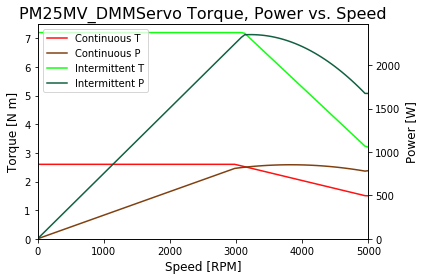

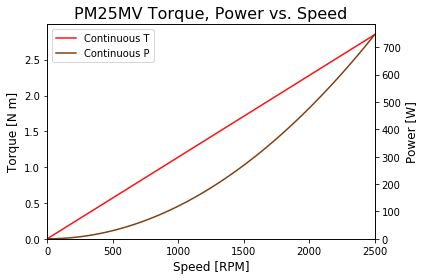

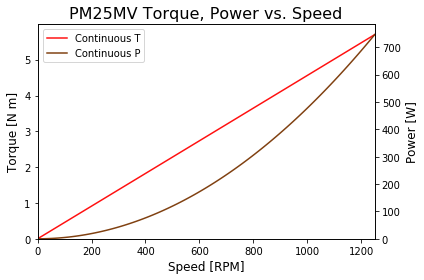

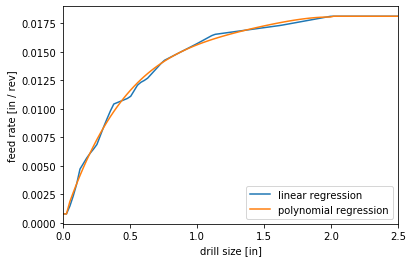

In [32]:
import pymachining as pm
import importlib
importlib.reload(pm)
from pymachining import ureg
import numpy as np
import pylab

# import pint
# ureg = pint.UnitRegistry(auto_reduce_dimensions=True)

# dir(ureg)
# 1 * ureg.minutes


# print(1 * ureg.tpm)

m = pm.MachinePM25MV_DMMServo()
# print(m.torque_continuous(4000 * (ureg.turn / ureg.min)))
# print(m.torque_continuous(3000 * ureg.tpm))
# print(m.torque_continuous(3000 * ureg.tpm) * (3000* ureg.tpm))
# print((m.torque_continuous(3000 * ureg.tpm) * (3000* ureg.tpm)).to('watt'))
# print(m.power_continuous(3000 * ureg.tpm).to('watt'))
# print(m.power_continuous(3000 * ureg.tpm))
# print(m.power_intermittent(3000 * ureg.tpm))
# print(dir(ureg))

m2 = pm.MachinePM25MV()
m2.set_gear_ratio(1)
print(m2.torque_continuous(2500))
print(m2.power_continuous(2500).to('hp'))

m2.set_gear_ratio(2)
print(m2.torque_continuous(1250))
print(m2.power_continuous(1250).to('hp'))

m.plot_torque_speed_curve()
m2.set_gear_ratio(1)
m2.plot_torque_speed_curve()
m2.set_gear_ratio(2)
m2.plot_torque_speed_curve()

x = np.linspace(0, 2.5, 100)
def f(diam, fit):
    d = pm.Drill(diam, None, None)
    v = d.feed_rate(fit)
    return v
y1 = [f(x_, False) for x_ in x]
y2 = [f(x_, True) for x_ in x]
pylab.xlabel('drill size [in]')
pylab.ylabel('feed rate [in / rev]')
pylab.xlim(0, 2.5)
pylab.plot(x, y1, label='linear regression')
pylab.plot(x, y2, label='polynomial regression')
pylab.legend()
pylab.show()

In [29]:
cutter_diameter = 12.7 * ureg.mm
rpm = 1000 * ureg.tpm

v_c = pm.DrillOp.cutting_speed_(cutter_diameter, rpm)

print(cutter_diameter, rpm, v_c, sep='\n')

print(pm.DrillOp.speed_(cutter_diameter, rpm))
print(pm.DrillOp.sfm_(cutter_diameter, rpm))

12.7 millimeter
1000 turn / minute
39898.22670059037 millimeter * turn / minute
39898.22670059037 millimeter * turn / minute
39898.22670059037 millimeter * turn / minute
39898.22670059037 millimeter * turn / minute
130.89969389957471 foot * turn / minute


In [33]:
cutter_diameter = 12.7 * ureg.mm
stock_material = pm.Material('aluminum')
drill = pm.DrillOp(cutter_diameter, stock_material)

In [34]:
rpm = 1000 * ureg.tpm

v_c = drill.cutting_speed(rpm)

print(cutter_diameter, rpm, v_c, sep='\n')

print(drill.speed(rpm))
print(drill.sfm(rpm))
print(drill.rrpm(drill.speed(rpm)))
print(drill.rrpm(drill.sfm(rpm)))
print(drill.rrpm(stock_material.sfm()))

12.7 millimeter
1000 turn / minute
39898.22670059037 millimeter * turn / minute
39898.22670059037 millimeter * turn / minute
130.89969389957471 foot * turn / minute
1000.0 turn / minute
999.9999999999999 turn / minute
1909.8593171027437 turn / minute


In [111]:
cutter_diameter = 12.7 * ureg.mm
cutting_speed = 40 * ureg.m / ureg.min

n = pm.DrillOp.spindle_speed_(cutter_diameter, cutting_speed)
print(n)
print(f'{n:.2f}')

1002.5508226261124 / minute
1002.5508226261124 revolutions_per_minute
1002.55 revolutions_per_minute


In [112]:
cutting_speed = 40 * ureg.m / ureg.min

n = drill.spindle_speed(cutting_speed)
print(n)
print(f'{n:.2f}')

1002.5508226261124 / minute
1002.5508226261124 revolutions_per_minute
1002.55 revolutions_per_minute


In [113]:
# speed_per_revolution = 1 * ureg.mm / ureg.revolution
# spindle_speed = 1000 * ureg.revolutions_per_minute

# using turn instead of rev_per_min results in simplier final units, without need for to_base_units()
speed_per_revolution = 1 * ureg.mm / ureg.turn
spindle_speed = 1000 * (ureg.turn / ureg.minute)

v_f = pm.DrillOp.penetration_rate_(speed_per_revolution, spindle_speed)

print(v_f)
# print(v_f.to_compact())
# print(v_f.to_base_units())
# print(v_f.to_reduced_units())
# print(v_f.to(ureg.mm / ureg.min))

1000.0 millimeter / minute


In [114]:
# speed_per_revolution = 1 * ureg.mm / ureg.revolution
# spindle_speed = 1000 * ureg.revolutions_per_minute

# using turn instead of rev_per_min results in simplier final units, without need for to_base_units()
speed_per_revolution = 1 * ureg.mm / ureg.turn
spindle_speed = 1000 * (ureg.turn / ureg.minute)

v_f = drill.penetration_rate_(speed_per_revolution, spindle_speed)

print(v_f)
# print(v_f.to_compact())
# print(v_f.to_base_units())
# print(v_f.to_reduced_units())
# print(v_f.to(ureg.mm / ureg.min))

1000.0 millimeter / minute


In [115]:
penetration_rate = 1000 * ureg.mm / ureg.min
spindle_speed = 1000 * (ureg.turn / ureg.min)

f_n = pm.DrillOp.feed_per_revolution_(penetration_rate, spindle_speed)

print(f_n)

1.0 millimeter / turn


In [116]:
penetration_rate = 1000 * ureg.mm / ureg.min
spindle_speed = 1000 * (ureg.turn / ureg.min)

f_n = drill.feed_per_revolution(penetration_rate, spindle_speed)

print(f_n)

1.0 millimeter / turn


In [117]:
cutter_diameter = 12.7 * ureg.mm
feed_per_revolution = 1 * ureg.mm / ureg.turn
# spindle_speed = 1000 * ureg.revolutions_per_minute
cutting_speed = 1000 * ureg.mm / ureg.min

Q = pm.DrillOp.metal_removal_rate_(cutter_diameter, feed_per_revolution, spindle_speed)

print(Q)
print(Q.to('cm^3 / min'))

126676.86977437443 millimeter ** 3 / minute
126.67686977437442 centimeter ** 3 / minute


In [118]:
feed_per_revolution = 1 * ureg.mm / ureg.turn
# spindle_speed = 1000 * ureg.revolutions_per_minute
cutting_speed = 1000 * ureg.mm / ureg.min

Q = drill.metal_removal_rate(feed_per_revolution, spindle_speed)

print(Q)
print(Q.to('cm^3 / min'))

126676.86977437443 millimeter ** 3 / minute
126.67686977437442 centimeter ** 3 / minute


In [119]:
cutter_diameter = 12.7 * ureg.mm
feed_per_revolution = 1 * ureg.mm / ureg.turn
# spindle_speed = 1000 * ureg.revolutions_per_minute
spindle_speed = 1000 * (ureg.turn / ureg.minute)

Q = pm.DrillOp.metal_removal_rate_(cutter_diameter, feed_per_revolution, spindle_speed)

print(Q)
print(Q.to('cm^3 / min'))

126676.86977437443 millimeter ** 3 / minute
126.67686977437442 centimeter ** 3 / minute


In [120]:
cutter_diameter = 12.7 * ureg.mm
feed_per_revolution = 1 * ureg.mm / ureg.turn
# spindle_speed = 1000 * ureg.revolutions_per_minute
spindle_speed = 1000 * (ureg.turn / ureg.minute)

Q = drill.metal_removal_rate(feed_per_revolution, spindle_speed)

print(Q)
print(Q.to('cm^3 / min'))

126676.86977437443 millimeter ** 3 / minute
126.67686977437442 centimeter ** 3 / minute


In [121]:
cutter_diameter = 12.7 * ureg.mm
feed_per_revolution = .2 * (ureg.mm / ureg.turn)
cutting_speed = 75 * (ureg.m / ureg.min)
cutting_speed = 75 * 1000 * (ureg.mm / ureg.min)
specific_cutting_force = 350 * (ureg.newton / ureg.mm ** 2)
# specific_cutting_force.to('kilowatt / cm**3 / min')

print(specific_cutting_force.to_base_units())
P = pm.DrillOp.net_power__(cutter_diameter, feed_per_revolution, cutting_speed, specific_cutting_force)

# print(P)

350000000.0 kilogram / meter / second ** 2


In [122]:
cutter_diameter = 12.7 * ureg.mm
feed_per_revolution = .2 * (ureg.mm / ureg.turn)
cutting_speed = 75 * (ureg.m / ureg.min)
cutting_speed = 75 * 1000 * (ureg.mm / ureg.min)
specific_cutting_force = 350 * (ureg.newton / ureg.mm ** 2)
# specific_cutting_force.to('kilowatt / cm**3 / min')

print(specific_cutting_force.to_base_units())
P = drill.net_power2(feed_per_revolution, cutting_speed, specific_cutting_force)

# print(P)

350000000.0 kilogram / meter / second ** 2


In [151]:
cutter_diameter = 12.7 * ureg.mm
feed_per_revolution = .2 * (ureg.mm / ureg.turn)
feed_per_revolution = .01 * .75 * (ureg.inch / ureg.turn)
spindle_rpm = 1000 * (ureg.turn / ureg.min)

# Be careful with expressing units, the way they are written in text may not be the way they should be written in code
# specific_cutting_energy = .065 * (ureg.kilowatt / ureg.cm**3 / ureg.min)
# print(specific_cutting_energy)
specific_cutting_energy = .065 * (ureg.kilowatt / (ureg.cm**3 / ureg.min))
# print(specific_cutting_energy)

P = pm.DrillOp.net_power_(cutter_diameter, feed_per_revolution, spindle_rpm, specific_cutting_energy)

print(P)

1.568576339981191 kilowatt


In [37]:
cutter_diameter = 12.7 * ureg.mm
feed_per_revolution = .2 * (ureg.mm / ureg.turn)
spindle_rpm = 1000 * (ureg.turn / ureg.min)

# Be careful with expressing units, the way they are written in text may not be the way they should be written in code
# specific_cutting_energy = .065 * (ureg.kilowatt / ureg.cm**3 / ureg.min)
# print(specific_cutting_energy)
specific_cutting_energy = .065 * (ureg.kilowatt / (ureg.cm**3 / ureg.min))
# print(specific_cutting_energy)

P = drill.net_power(feed_per_revolution, spindle_rpm, specific_cutting_energy)

print(P)

print(drill.feed_rate())

1.6467993070668676 kilowatt


AttributeError: 'DrillOp' object has no attribute 'feed_rate'

In [125]:
def torque(net_power, spindle_speed):
    P_c = net_power
    n = spindle_speed
    M_c = (P_c * 30 * 10**3) / (math.pi * n)
    return M_c # N m


def specific_cutting_force():
    k_c = 0.
    return k_c # N / mm^2


def feed_force():
    F_f = 0.
    return F_f # N


def machining_time(I_m, penetration_rate):
    I_m = I_m
    v_f = penetration_rate
    T_c = I_m / v_f
    return T_c # min


ureg = pint.UnitRegistry(auto_reduce_dimensions=True)

cutter_diameter = 12.7 * ureg.mm
cutting_speed = 76 * ureg.m / ureg.min
rpm = spindle_speed(cutter_diameter, cutting_speed)
print(rpm)
print(rpm.to_compact())
    
print(cutter_diameter, rpm, cutting_speed(cutter_diameter, rpm))

spindle_speed = 1000 / ureg.min
speed_per_revolution = 1 * ureg.mm

print(penetration_rate(speed_per_revolution, spindle_speed))


TypeError: 'Quantity' object is not callable

In [126]:
print((1 * (ureg.turn / ureg.min)) * (1 * (ureg.mm / ureg.turn)))

1 millimeter / minute


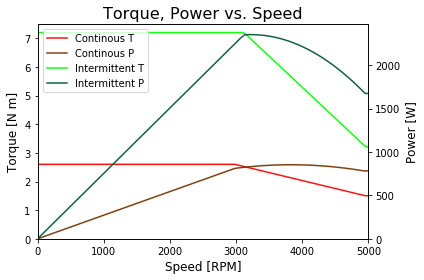

In [27]:
m = pm.MachinePM25_DMMServo()

import pylab
import numpy as np

x = np.linspace(m.min_rpm, m.max_rpm, 100) * ureg.tpm

# y1 = np.vectorize(m.torque_continuous)(x)
# y2 = np.vectorize(m.torque_intermittent)(x)
# y1 = [m.torque_continuous(x_) for x_ in x]
# y2 = [m.torque_intermittent(x_) for x_ in x]
y1 = np.array([m.torque_continuous(x_).magnitude for x_ in x]) * (ureg.newton * ureg.meter)
y2 = np.array([m.torque_intermittent(x_).magnitude for x_ in x]) * (ureg.newton * ureg.meter)

fig, ax1 = pylab.subplots()

ax1.set_title("Torque, Power vs. Speed", fontsize = 16.)

ax1.set_xlabel("Speed [RPM]", fontsize = 12)
ax1.set_ylabel("Torque [N m]", fontsize = 12)
ax1.set_xlim([x[0].magnitude, x[-1].magnitude])

ax2 = ax1.twinx()
ax2.set_ylabel("Power [W]", fontsize = 12)

colors = ['#ff0000ee', '#773300ee', '#00ff00ee', '#005533ee']

lns = []

lns += ax1.plot(x,y1, color=colors[0], label='Continous T')
lns += ax2.plot(x,y1*x/9.5488, color=colors[1], label='Continous P')

lns += ax1.plot(x,y2, color=colors[2], label='Intermittent T')
lns += ax2.plot(x,y2*x/9.5488, color=colors[3], label='Intermittent P')

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left')

fig.tight_layout()
pylab.show()

In [35]:
rr = ureg.turn / ureg.min
1 * rr
ureg.rpm = ureg.turn / ureg.min
1 * ureg.rpm

1 <Unit('turn / minute')>

In [34]:
import ipywidgets as widgets

a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)
c = m.torque_continuous(b.value).magnitude
print(dir(a))
a.value = c
mylink = widgets.jslink((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

['__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_notifiers', '_call_widget_constructed', '_comm_changed', '_compare', '_cross_validation_lock', '_default_keys', '_display_callbacks', '_dom_classes', '_gen_repr_from_keys', '_get_embed_state', '_handle_custom_msg', '_handle_displayed', '_handle_msg', '_holding_sync', '_ipython_display_', '_is_numpy', '_lock_property', '_log_default', '_model_id', '_model_module', '_model_module_version', '_model_name', '_msg_callbacks', '_notify_trait', '_property_lock', '_register_validator', '_remove_notifiers', '_repr_keys', '_send', '_should_send_property', '_states_to_send', '_trait_default_generators', '_trait

In [69]:
def f(rpm):
    print(rpm)
    t = m.torque_continuous(rpm)
    print(f'{t:.2f}')
    return t
    
widgets.interact(f, rpm = widgets.FloatSlider(min=m.min_rpm.magnitude, max=m.max_rpm.magnitude, step=10))
# display()

interactive(children=(FloatSlider(value=0.0, description='rpm', max=5000.0, step=10.0), Output()), _dom_classe…

<function __main__.f(rpm)>

In [58]:
a = 1.
print(isinstance(a, ureg.Quantity))
a = 1 *ureg.tpm
print(isinstance(a, ureg.Quantity))


False
True
